● Predict the percentage of an student based on the no. of study hours
● Data can be found at http://bit.ly/w-data
● What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# Importing Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# Reading Data
df = pd.read_csv("student_scores.csv")
print(df.shape)
df.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Collecting X and Y
X = df['Hours'].values
Y = df['Scores'].values

In [4]:
# Mean X and Y
meanx = np.mean(X)
meany = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - meanx) * (Y[i] - meany)
    denominator += (X[i] - meanx) ** 2
m = numerator / denominator
c = meany - (m * meanx)

# Print coefficients
print('m = ', m ,'& c = ', c)

m =  9.775803390787475 & c =  2.4836734053731746


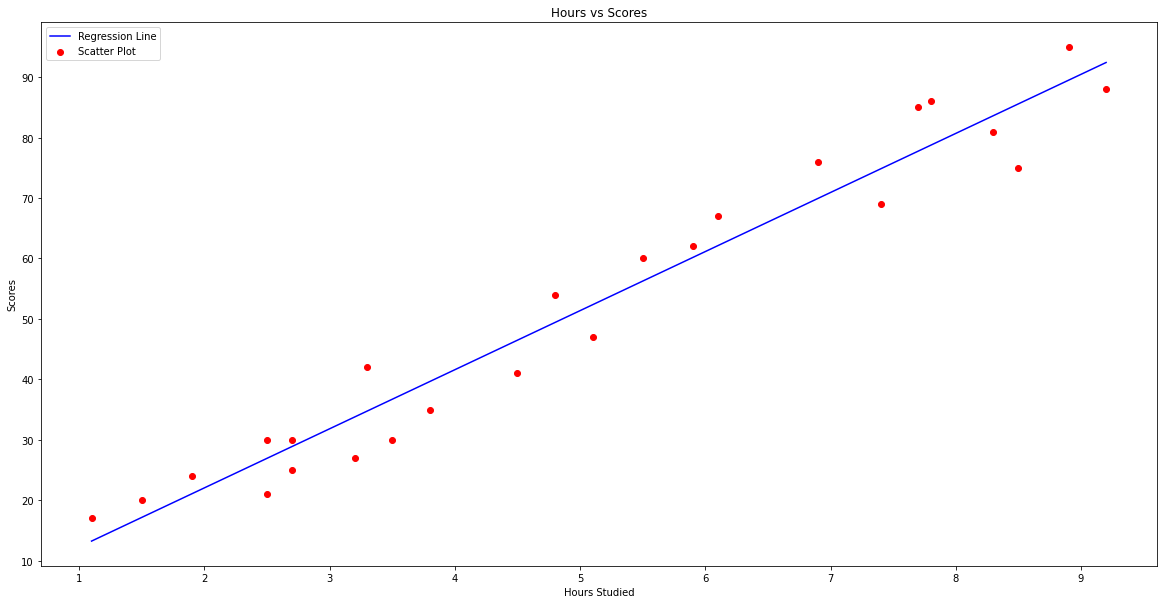

In [57]:
# Plotting Values and Regression Line

max_x = np.max(X)
min_x = np.min(X)

# Calculating line values x and y
x = np.linspace(min_x, max_x)
y = c + m * x

# Plotting Line
plt.plot(x, y , color='blue', label = 'Regression Line')
# Plotting Scatter Plot
plt.scatter(X, Y , color='red' , label = 'Scatter Plot')

# naming the x axis
plt.xlabel('Hours Studied')
# naming the y axis
plt.ylabel('Scores')
  
# giving a title to my graph
plt.title('Hours vs Scores')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

In [5]:
df['Predicted_Scores'] = c + m * df['Hours']
print(df)

    Hours  Scores  Predicted_Scores
0     2.5      21         26.923182
1     5.1      47         52.340271
2     3.2      27         33.766244
3     8.5      75         85.578002
4     3.5      30         36.698985
5     1.5      20         17.147378
6     9.2      88         92.421065
7     5.5      60         56.250592
8     8.3      81         83.622842
9     2.7      25         28.878343
10    7.7      85         77.757360
11    5.9      62         60.160913
12    4.5      41         46.474789
13    3.3      42         34.743825
14    1.1      17         13.237057
15    8.9      95         89.488324
16    2.5      30         26.923182
17    1.9      24         21.057700
18    6.1      67         62.116074
19    7.4      69         74.824618
20    2.7      30         28.878343
21    4.8      54         49.407530
22    3.8      35         39.631726
23    6.9      76         69.936717
24    7.8      86         78.734940


In [6]:
StudyHrs = input("Enter Study Hrs: ")
Predicted_Score = c + m * float(StudyHrs)
print('Predicted Score is :' , Predicted_Score)

Enter Study Hrs: 9.25
Predicted Score is : 92.90985477015732


In [7]:
Scores = df['Scores']
Predicted_Scores = df['Predicted_Scores']

In [8]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Scores, Predicted_Scores))

Mean Absolute Error: 4.972805319866378


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Reading Data
df2 = pd.read_csv("student_scores.csv")
print(df2.shape)
df2.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
x = df2.iloc[:, :-1].values
y = df2.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)
print(y_pred)

[15.69806718 75.68054576 46.19763256 11.63145847 25.86458897]


In [9]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df3) 

NameError: name 'y_test' is not defined

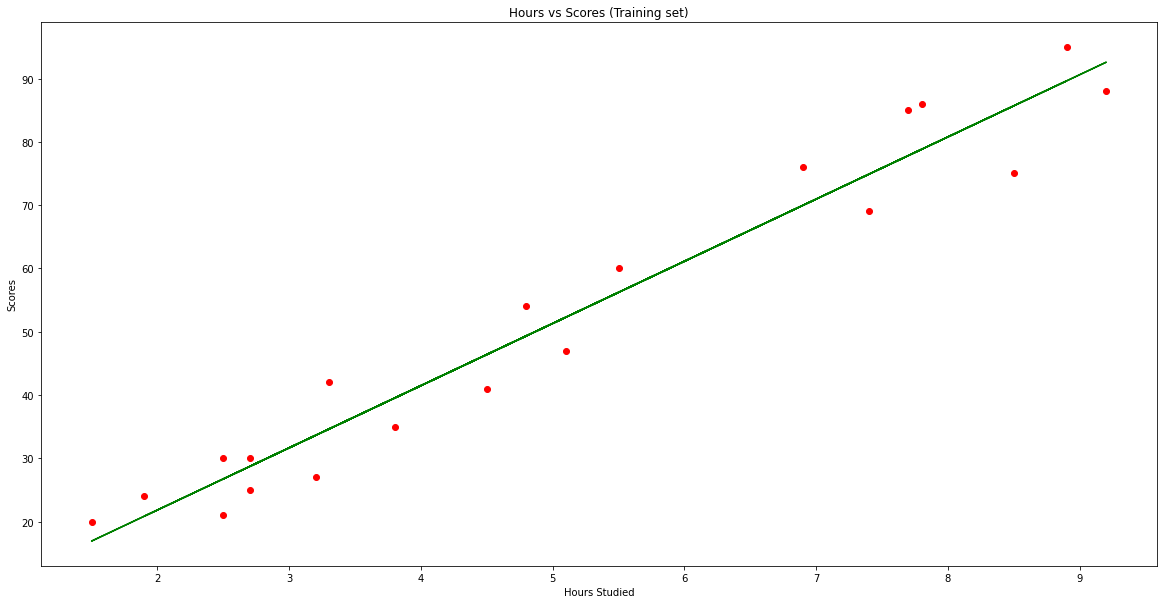

In [70]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Hours vs Scores (Training set)")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

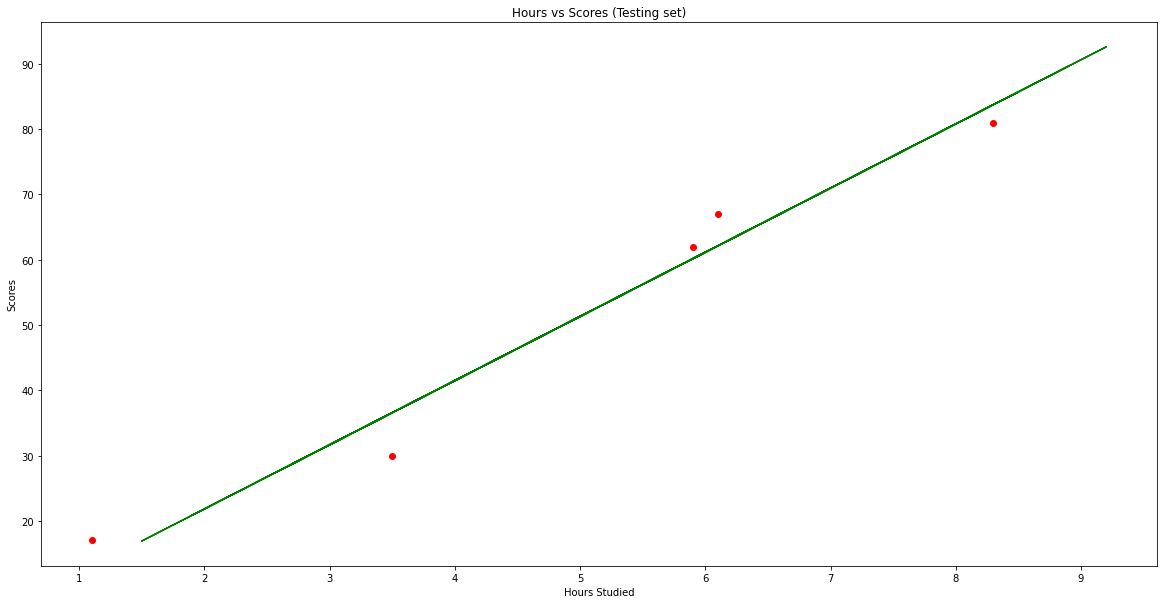

In [71]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Hours vs Scores (Testing set)")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

In [72]:
StudyHrs = input("Enter Study Hrs: ")
Predicted_Score = lr.predict([[float(StudyHrs)]])
print('Predicted Score is :' , Predicted_Score)

Enter Study Hrs: 9.25
Predicted Score is : [93.06816848]


In [73]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.011280696605034
